# Welcome to SLICED!  
Thank you so much for being interested in competing in SLICED. We very much want to see you be a contestant on the show. This technical skill check helps us out and also helps you out. First, we want you to feel comfortable with what skills you need to know going into SLICED. If you do not feel comfortable performing any of the challenges below, SLICED may not be the most fun for you. Second, we want to feel comfortable showcasing your talents. 

Here are some general pointers we believe make successful contestants:  

- Strong methodology on how to get from the beginning of the SLICED dataset to the end  
- A sense for data visualization for describing the dataset as well as describing your modeling  
- Good feel for time management -- so you can get all your cool data science in on time  
- Being clear in your code about what you are trying to do (i.e. through commenting/markdown)  
- A little flair/personality while you code  


We want a wide array of folks to participate. The following challenges are a baseline and should not take very long to complete. If you find yourself spending a lot of time on the challenges below you may want to reconsider being a contestant. 

# The Data: 2019 MLB Statcast 
[Click here to access the datasets](https://drive.google.com/drive/folders/1tEBhVqpRveUYV70PPJHQ_YYrVWBD2Jpi?usp=sharing)  

The data comes from the public Baseball Savant CSV repo via `pybaseball`. The data dictionary can be found here:  
https://baseballsavant.mlb.com/csv-docs  

Note that some of the columns listed have been removed from this dataset. The removed columns are either mostly null values or (personally speaking) uninteresting if someone was going to use those columns as part of their screener. 

# Challenge 1: Data munging  
Make sure you can load the two data files into your environment. They are called `2019-statcast.csv` and `batter-names.csv`. 

You'll see there are a lot of columns. Please refer to the [Statcast CSV documentation](https://baseballsavant.mlb.com/csv-docs) for details on each of the columns. 

**Join the `batter_names.csv` file onto the `2019-statcast.csv` dataset.** The dataset has a `player_name` column, but it mostly reserved for pitchers. 

In SLICED, there is a holdout set you will not have access to. Making sure your joins and your feature engineering works on the holdout set will be critical. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

In [2]:
batters_df = pd.read_csv('./data/batter-names.csv')
batters_df.head()

,key_mlbam,batter_name
0,547989,"abreu, josé"
1,660670,"acuna, ronald"
2,542436,"adames, cristhian"
3,642715,"adames, willy"
4,613534,"adams, austin"


In [3]:
statcast_df = pd.read_csv('./data/2019-statcast.csv')
print(len(statcast_df))
statcast_df = statcast_df.merge(batters_df, left_on=['batter'], right_on=['key_mlbam'])
print(len(statcast_df))
statcast_df.head()


743356
743356


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,key_mlbam,batter_name
0,SL,2019-10-30,87.9,-2.65,5.50,"Hudson, Daniel",488726,543339,strikeout,swinging_strike,...,2,2,6,Infield shift,Standard,175.0,-0.001,-0.137,488726,"brantley, michael"
1,FF,2019-10-30,95.9,-2.77,5.52,"Hudson, Daniel",488726,543339,NaN,foul,...,2,2,6,Infield shift,Standard,201.0,-0.001,0.000,488726,"brantley, michael"
2,FF,2019-10-30,96.5,-2.68,5.42,"Hudson, Daniel",488726,543339,NaN,ball,...,2,2,6,Infield shift,Standard,205.0,-0.001,0.038,488726,"brantley, michael"
3,FF,2019-10-30,96.0,-2.65,5.55,"Hudson, Daniel",488726,543339,NaN,foul,...,2,2,6,Infield shift,Standard,208.0,-0.001,-0.033,488726,"brantley, michael"
4,SL,2019-10-30,86.7,-2.73,5.59,"Hudson, Daniel",488726,543339,NaN,ball,...,2,2,6,Infield shift,Standard,186.0,-0.001,0.024,488726,"brantley, michael"


In [4]:
#

In [5]:
#

In [6]:
#

# Challenge 2: Modeling  
During SLICED, the most points are earned by having the most accurate model or the model with the lowest loss. 

There are several columns in the `2019-statcast.csv` dataset you can predict on. Feel free to select one column from below and make a model to predict your selected column: 
- `delta_runs_exp`  
- `delta_home_win_exp`  
- `description` 
- `events`  
- `hit_distance_sc`  
- `pitch_type` / `pitch_name`  

Here are a few columns that are commonly used in predicting the target columns above:  
```
['inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'stand', 
 'p_throws', 'effective_speed', 'release_spin_rate', 'spin_axis', 'pfx_x', 
 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot']
 ```

If you are interested in looking at batting, here are some additional columns that could be useful in your analysis: 
```
['hc_x', 'hc_y', 'launch_speed', 'launch_angle'] 
```

Note that these are only a few of the things you can use in your model. There are plenty of features to manipulate and engineer from these data so feel free to be creative and try different features.  

**Please come up with two different models that predict your target column. Explain the differences in your two models and the pros-and-cons for each of your models.** 

SLICED contestants have tried many different modeling techniques, so having a few different modeling choices in your skill set will help you improve your chances at winning. 

Remember! This is a SCREENER, not a TEST. You do not have to have a SUPER ACCURATE model to showcase your modeling skills. We are looking for basic modeling skills so you can have a good, competitive time on SLICED.

In [7]:
# what column should I predict?
set(statcast_df['pitch_name']), set(statcast_df['pitch_type'])
# ^ would be classification

({'2-Seam Fastball',
  '4-Seam Fastball',
  'Changeup',
  'Curveball',
  'Cutter',
  'Eephus',
  'Forkball',
  'Knuckle Curve',
  'Knuckleball',
  'Sinker',
  'Slider',
  'Split-Finger',
  nan},
 {'CH', 'CU', 'EP', 'FC', 'FF', 'FO', 'FS', 'FT', 'KC', 'KN', 'SI', 'SL', nan})

In [8]:
# I don't even know what run expectancy is, so I will go with predicting pitch_name

Explore some features! ... starting with the suggested ones

In [9]:
cols = ['inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'stand', 
 'p_throws', 'effective_speed', 'release_spin_rate', 'spin_axis', 'pfx_x', 
 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot']

In [10]:
data_df = statcast_df[cols + ['pitch_name']]
data_df.head()

,inning,inning_topbot,outs_when_up,balls,strikes,stand,p_throws,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,pitch_name
0,9,Bot,2,3,2,L,R,87.8,2461.0,175.0,0.02,0.21,0.88,1.03,3.35,1.40,Slider
1,9,Bot,2,3,2,L,R,94.4,2572.0,201.0,-0.57,1.52,-0.47,1.92,3.35,1.56,4-Seam Fastball
2,9,Bot,2,2,2,L,R,95.3,2637.0,205.0,-0.66,1.40,1.68,1.35,3.53,1.63,4-Seam Fastball
3,9,Bot,2,2,1,L,R,94.9,2598.0,208.0,-0.81,1.50,0.75,2.05,3.35,1.56,4-Seam Fastball
4,9,Bot,2,1,1,L,R,87.0,2598.0,186.0,-0.05,0.47,1.27,2.17,3.59,1.63,Slider


In [11]:
# Why is there so much missing data???

data_df[data_df.isnull().any(axis=1)]

,inning,inning_topbot,outs_when_up,balls,strikes,stand,p_throws,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,pitch_name
25,5,Bot,2,0,0,L,R,82.5,NaN,71.0,0.82,-0.29,-1.02,2.43,3.48,1.58,Curveball
58,3,Top,1,0,0,L,L,81.4,NaN,320.0,-0.19,-0.23,-0.14,2.25,3.39,1.55,Slider
89,3,Bot,2,1,2,L,R,88.8,NaN,258.0,-1.31,0.26,-0.58,2.67,3.40,1.65,Changeup
147,3,Top,1,0,2,L,L,89.6,NaN,230.0,-0.29,0.24,-1.35,0.97,3.22,1.53,Cutter
201,1,Top,1,0,2,L,R,85.2,NaN,75.0,0.34,-0.09,0.26,1.38,3.27,1.46,Slider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743351,4,Top,0,1,1,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743352,4,Top,0,0,1,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743353,4,Top,0,0,0,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743354,3,Top,0,1,0,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_df[data_df['release_spin_rate'].isnull()]

,inning,inning_topbot,outs_when_up,balls,strikes,stand,p_throws,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,pitch_name
25,5,Bot,2,0,0,L,R,82.5,NaN,71.0,0.82,-0.29,-1.02,2.43,3.48,1.58,Curveball
58,3,Top,1,0,0,L,L,81.4,NaN,320.0,-0.19,-0.23,-0.14,2.25,3.39,1.55,Slider
89,3,Bot,2,1,2,L,R,88.8,NaN,258.0,-1.31,0.26,-0.58,2.67,3.40,1.65,Changeup
147,3,Top,1,0,2,L,L,89.6,NaN,230.0,-0.29,0.24,-1.35,0.97,3.22,1.53,Cutter
201,1,Top,1,0,2,L,R,85.2,NaN,75.0,0.34,-0.09,0.26,1.38,3.27,1.46,Slider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743351,4,Top,0,1,1,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743352,4,Top,0,0,1,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743353,4,Top,0,0,0,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
743354,3,Top,0,1,0,L,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Maybe I will just going to throw out the missing data... hopefully the holdout set doesn't include rows with missing data?
# I think filling nans with 0 would mess up rest of model. I guess I could maybe just fill with average value? 


In [14]:
data_df[data_df['inning_topbot'].isnull()]

,inning,inning_topbot,outs_when_up,balls,strikes,stand,p_throws,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,pitch_name


In [15]:
for col in cols:
    if len(data_df[data_df[col].isnull()]) > 0:
        data_df[col] = data_df[col].fillna(value=data_df[col].mean())

data_df['pitch_name'] = data_df['pitch_name'].fillna('None')

<ipython-input-15-89032f8614c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df[col] = data_df[col].fillna(value=data_df[col].mean())
<ipython-input-15-89032f8614c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['pitch_name'] = data_df['pitch_name'].fillna('None')


In [16]:
corr = data_df.corr()
corr

,inning,outs_when_up,balls,strikes,effective_speed,release_spin_rate,spin_axis,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
inning,1.000000,-0.001030,-0.000563,-0.000484,0.049629,0.048205,-0.013004,-0.009995,-0.018242,0.004309,-0.006610,-0.023061,-0.024472
outs_when_up,-0.001030,1.000000,0.015550,-0.000516,0.006591,0.022160,-0.011552,0.009945,-0.031313,0.012946,-0.027091,0.012979,0.010506
balls,-0.000563,0.015550,1.000000,0.385507,0.066270,-0.027171,0.028679,-0.023420,0.063706,-0.014136,0.009178,-0.020741,-0.008303
strikes,-0.000484,-0.000516,0.385507,1.000000,-0.013837,0.024418,-0.025712,0.025171,-0.070005,0.031340,-0.034162,-0.024720,-0.013137
effective_speed,0.049629,0.006591,0.066270,-0.013837,1.000000,-0.043835,0.213866,-0.242355,0.577164,-0.039553,0.228065,0.019398,0.022878
release_spin_rate,0.048205,0.022160,-0.027171,0.024418,-0.043835,1.000000,-0.276837,0.220316,-0.190177,0.105822,0.007403,-0.013172,-0.014858
spin_axis,-0.013004,-0.011552,0.028679,-0.025712,0.213866,-0.276837,1.000000,-0.795457,0.312981,-0.233949,0.083700,0.008370,0.010291
pfx_x,-0.009995,0.009945,-0.023420,0.025171,-0.242355,0.220316,-0.795457,1.000000,-0.242085,0.245440,-0.060509,-0.000196,-0.003726
pfx_z,-0.018242,-0.031313,0.063706,-0.070005,0.577164,-0.190177,0.312981,-0.242085,1.000000,-0.054996,0.349148,0.036588,0.031820
plate_x,0.004309,0.012946,-0.014136,0.031340,-0.039553,0.105822,-0.233949,0.245440,-0.054996,1.000000,-0.165873,0.008347,0.001262


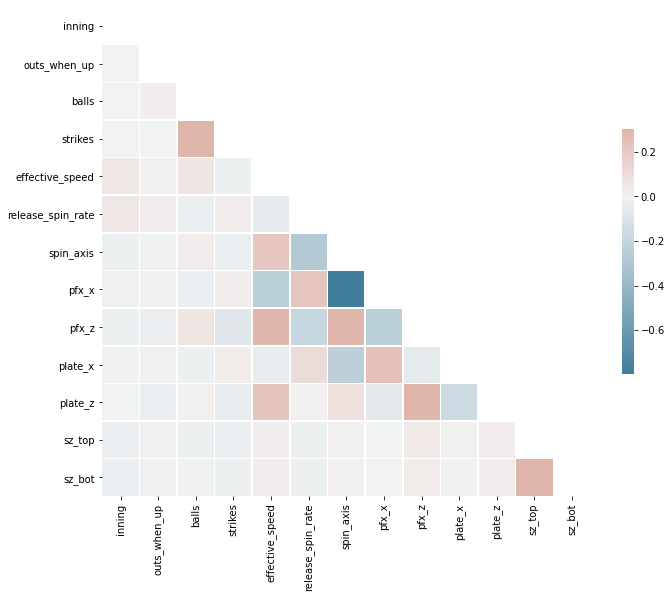

In [17]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
# ok interesting, vertical movement is very correlated with spin axis... guess that makes sense


In [19]:
# I like catboost - good default hyper params, handles categorical features well

In [20]:
def get_catboost_X_y(df, feature_cols):
    X = df[feature_cols]
    y = df['pitch_name']

    # train / val / test --- 0.5 / 0.25 / 0.25

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) # 0.5 x 0.5 = 0.25

    return X_train, X_val, X_test, y_train, y_val, y_test


In [21]:
catboost_cols = ['inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'stand', 
 'p_throws', 'effective_speed', 'release_spin_rate', 'spin_axis', 'pfx_x', 
 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot']
X_train, X_val, X_test, y_train, y_val, y_test = get_catboost_X_y(data_df, catboost_cols)

In [22]:
def make_catboost_model(X_train, y_train, X_val, y_val, cat_features=[]):
    # print(cat_features)
    for col in cat_features:
        X_train[col] = X_train.astype('category')
        X_val[col] = X_val.astype('category')

    model = CatBoostClassifier(iterations=100, learning_rate=0.48,
        cat_features=cat_features)

    model.fit(
        X_train, y_train,
        eval_set=(X_val, y_val),
        early_stopping_rounds=3,
        verbose=True,
        plot=False
    )

    return model

In [23]:
cat_features = ['inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes', 'stand', 'p_throws']
catboost_model = make_catboost_model(X_train, y_train, X_val, y_val, cat_features=cat_features)

0:	learn: 1.0840940	test: 1.0896386	best: 1.0896386 (0)	total: 1.15s	remaining: 1m 53s
1:	learn: 0.9320156	test: 0.9365494	best: 0.9365494 (1)	total: 2.41s	remaining: 1m 57s
2:	learn: 0.8344397	test: 0.8395632	best: 0.8395632 (2)	total: 3.59s	remaining: 1m 56s
3:	learn: 0.7732550	test: 0.7794119	best: 0.7794119 (3)	total: 4.71s	remaining: 1m 53s
4:	learn: 0.7337130	test: 0.7390019	best: 0.7390019 (4)	total: 5.83s	remaining: 1m 50s
5:	learn: 0.7020471	test: 0.7078934	best: 0.7078934 (5)	total: 6.93s	remaining: 1m 48s
6:	learn: 0.6824748	test: 0.6884727	best: 0.6884727 (6)	total: 8.02s	remaining: 1m 46s
7:	learn: 0.6656106	test: 0.6719083	best: 0.6719083 (7)	total: 9.01s	remaining: 1m 43s
8:	learn: 0.6557234	test: 0.6620547	best: 0.6620547 (8)	total: 10.2s	remaining: 1m 42s
9:	learn: 0.6414258	test: 0.6480322	best: 0.6480322 (9)	total: 11.3s	remaining: 1m 41s
10:	learn: 0.6281126	test: 0.6350973	best: 0.6350973 (10)	total: 12.5s	remaining: 1m 41s
11:	learn: 0.6215806	test: 0.6286553	best

In [24]:
y_pred = catboost_model.predict_proba(X_test)
log_loss(y_test, y_pred)

0.5642437007569904

In [28]:
y_hard_pred = catboost_model.predict(X_test)
y_hard_pred_df = pd.DataFrame(y_hard_pred, columns=['pitch_name']).reset_index().groupby('pitch_name').count().reset_index().rename(columns={'index': 'count'})
y_hard_pred_df

,pitch_name,count
0,2-Seam Fastball,6310
1,4-Seam Fastball,74368
2,Changeup,22499
3,Curveball,15364
4,Cutter,7779
5,Forkball,1
6,Knuckle Curve,2932
7,Knuckleball,25
8,None,1821
9,Sinker,15565


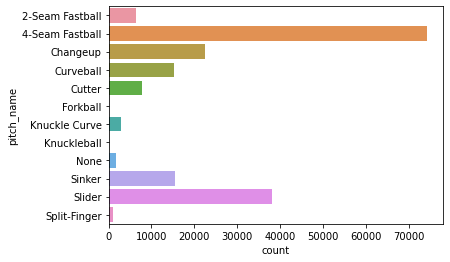

In [33]:
sns.barplot(x='count', y='pitch_name', orient='h', data=y_hard_pred_df)

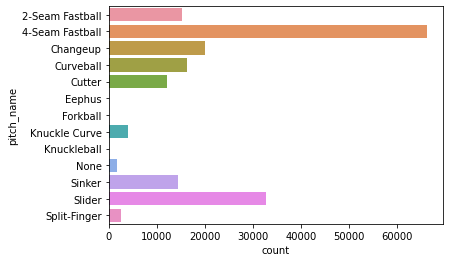

In [39]:
y_test_df = pd.DataFrame(y_test).reset_index().groupby('pitch_name').count().reset_index().rename(columns={'index': 'count'})
sns.barplot(x='count', y='pitch_name', orient='h', data=y_test_df)

Nice, looks like the predicted class distribution roughly match the actual class distribution

In [202]:
def get_logreg_X_y(df, feature_cols):
    X = df[feature_cols]
    y = df['pitch_name']

    # i forget if i need to scale train and test separately... oh well, for the purpose of this exercise...
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # train / test --- 0.75 / 0.25

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    return X_train, X_test, y_train, y_test, scaler


In [215]:
def make_logreg_model(X, y):
    model = LogisticRegressionCV(cv=3, random_state=0, max_iter=10).fit(X, y)
    return model

In [224]:
logreg_cols = ['effective_speed', 'release_spin_rate', 'spin_axis', 'pfx_x', 
 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot']
X_train, X_test, y_train, y_test, scaler = get_logreg_X_y(data_df, logreg_cols)

In [217]:
logreg_model = make_logreg_model(X_train, y_train)

/Users/canzhiye/.pyenv/versions/3.8.6/envs/soccer/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/canzhiye/.pyenv/versions/3.8.6/envs/soccer/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [225]:
y_pred = logreg_model.predict_proba(X_test)
log_loss(y_test, y_pred)

0.8240131284602645

Catboost vs logistic regression

Catboost is a gradient boosted tree model. It has great hyper params and has done well in many Kaggle competitions.
Logistic regression is a linear model.

Catboost:

pros:
- handles the categorical features in the dataset very well
- gave me better preds

cons: 
- harder to understand how the features contribute to the preds, although I could use SHAP

logistic regression

pros:
- feature weights are more interpretable 

cons: 
- solver seems to struggle on big data set, although I could've just trained on a sample...
- cannot capture interaction effects between variables, unless I specifically do the feature engineering for the interactions

# Challenge 3: Data visualization  

Now that you have some deeper understanding of the dataset, please generate some data visualization. 

**Plot two different graphs. One that shows some sort of relationship within the dataset and one that uses your predictions in the visualization.**  

There are two different graphing strategies in SLICED. Some folks have used graphing early in the contest as part of their exploratory analysis, finding correlations and selecting a smaller sample of features for modeling. Others have used graphing later in the contest, showing off prediction correlation or accuracy in graphical form. Both of these techniques have earned contestants points, so having the ability to do both is good for expanding your chances to gain those coveted data visualization points. 

Remember that the data viz points in SLICED are divided between contestants. It is possible to receiver all, some, or none of the points. Judges usually are looking for a mix of graphs that tell a story and aesthetically-pleasing graphs. 

# Some final notes and tips  
Remember that SLICED is intended to be a fun competition. This is not suppose to be a stress-inducing screener. We don't want underprepared contestants potentially having a troublesome time in front of many people. Live coding is already a difficult thing and feeling stuck in your code in front of many viewers can feel really stressful. We don't want that! 

We are not judging for accuracy in results. There are no correct answers in this screener. It is truly an evaluation of basic data science skills. If you are able to perform the basics here, you will have the potential to earn points on SLICED.  

The best screeners will highlight the data scientist's skills and have some flare. The audience responds to programmers who "chat" to them through comments and maybe have fun or funny ways of doing things. Feel free to be creative beyond just the challenges -- tell your story through markdown or through comments if you feel compelled! 

Finally, this all shouldn't take more than 2 hours. This is basically what a contestant on the show usually does and the show time is 2 hours long. So try not to take longer than 2 hours please!

# Submit your screener back to us  

**MAY 10TH DUE DATE!**

Please share with us your results! Here are some ways (in order of preference):

- Upload your results to your own public GitHub, bitbucket, or any other repo service and send us a link 
- Drop it into your Google Drive, Box, or cloud storage system and share with us the file (or folder)  
- Email it directly to us in PDF format. Please don't email us code; if you want to send us code, please upload your code somewhere as mentioned before! Also, please don't zip or compress the PDF into some other file format. 

Feel free to submit in any of these ways to hashtagsliced@gmail.com  
Submissions in other ways won't be considered, so double check to make sure you're submitting in one of the ways listed. 




